# Settings

In [1]:
featureMatrixFilePath = 'E:/MotionMatchingFeatureMatrix.csv'

# Load feature matrix

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA

def PrintGreen(text):
    print('\x1b[6;30;42m' + text + '\x1b[0m')
    
def PrintRed(text):
    print('\33[41m' + text + '\x1b[0m')

In [3]:
# Load the feature matrix from CSV
originalData = pd.read_csv(featureMatrixFilePath, na_values = 'null')
if originalData.shape[0] > 0 and originalData.shape[1] > 0:
    PrintGreen("Loading succeeded");
else:
    PrintRed("Loading failed!");

print("frames = " + str(originalData.shape[0]))
print("featureComponents = " + str(originalData.shape[1]))

# Ensure to show all columns
pd.set_option('max_columns', originalData.shape[1])

Loading succeeded
frames = 41203
featureComponents = 144


In [4]:
originalData.head(15)

,Trajectory.Past-6.PosX,Trajectory.Past-6.PosY,Trajectory.Past-6.PosZ,Trajectory.Past-6.DirX,Trajectory.Past-6.DirY,Trajectory.Past-6.DirZ,Trajectory.Past-6.FacingDirX,Trajectory.Past-6.FacingDirY,Trajectory.Past-6.FacingDirZ,Trajectory.Past-6.Speed,Trajectory.Past-5.PosX,Trajectory.Past-5.PosY,Trajectory.Past-5.PosZ,Trajectory.Past-5.DirX,Trajectory.Past-5.DirY,Trajectory.Past-5.DirZ,Trajectory.Past-5.FacingDirX,Trajectory.Past-5.FacingDirY,Trajectory.Past-5.FacingDirZ,Trajectory.Past-5.Speed,Trajectory.Past-4.PosX,Trajectory.Past-4.PosY,Trajectory.Past-4.PosZ,Trajectory.Past-4.DirX,Trajectory.Past-4.DirY,Trajectory.Past-4.DirZ,Trajectory.Past-4.FacingDirX,Trajectory.Past-4.FacingDirY,Trajectory.Past-4.FacingDirZ,Trajectory.Past-4.Speed,Trajectory.Past-3.PosX,Trajectory.Past-3.PosY,Trajectory.Past-3.PosZ,Trajectory.Past-3.DirX,Trajectory.Past-3.DirY,Trajectory.Past-3.DirZ,Trajectory.Past-3.FacingDirX,Trajectory.Past-3.FacingDirY,Trajectory.Past-3.FacingDirZ,Trajectory.Past-3.Speed,Trajectory.Past-2.PosX,Trajectory.Past-2.PosY,Trajectory.Past-2.PosZ,Trajectory.Past-2.DirX,Trajectory.Past-2.DirY,Trajectory.Past-2.DirZ,Trajectory.Past-2.FacingDirX,Trajectory.Past-2.FacingDirY,Trajectory.Past-2.FacingDirZ,Trajectory.Past-2.Speed,Trajectory.Past-1.PosX,Trajectory.Past-1.PosY,Trajectory.Past-1.PosZ,Trajectory.Past-1.DirX,Trajectory.Past-1.DirY,Trajectory.Past-1.DirZ,Trajectory.Past-1.FacingDirX,Trajectory.Past-1.FacingDirY,Trajectory.Past-1.FacingDirZ,Trajectory.Past-1.Speed,Trajectory.Current.PosX,Trajectory.Current.PosY,Trajectory.Current.PosZ,Trajectory.Current.DirX,Trajectory.Current.DirY,Trajectory.Current.DirZ,Trajectory.Current.FacingDirX,Trajectory.Current.FacingDirY,Trajectory.Current.FacingDirZ,Trajectory.Current.Speed,Trajectory.Future1.PosX,Trajectory.Future1.PosY,Trajectory.Future1.PosZ,Trajectory.Future1.DirX,Trajectory.Future1.DirY,Trajectory.Future1.DirZ,Trajectory.Future1.FacingDirX,Trajectory.Future1.FacingDirY,Trajectory.Future1.FacingDirZ,Trajectory.Future1.Speed,Trajectory.Future2.PosX,Trajectory.Future2.PosY,Trajectory.Future2.PosZ,Trajectory.Future2.DirX,Trajectory.Future2.DirY,Trajectory.Future2.DirZ,Trajectory.Future2.FacingDirX,Trajectory.Future2.FacingDirY,Trajectory.Future2.FacingDirZ,Trajectory.Future2.Speed,Trajectory.Future3.PosX,Trajectory.Future3.PosY,Trajectory.Future3.PosZ,Trajectory.Future3.DirX,Trajectory.Future3.DirY,Trajectory.Future3.DirZ,Trajectory.Future3.FacingDirX,Trajectory.Future3.FacingDirY,Trajectory.Future3.FacingDirZ,Trajectory.Future3.Speed,Trajectory.Future4.PosX,Trajectory.Future4.PosY,Trajectory.Future4.PosZ,Trajectory.Future4.DirX,Trajectory.Future4.DirY,Trajectory.Future4.DirZ,Trajectory.Future4.FacingDirX,Trajectory.Future4.FacingDirY,Trajectory.Future4.FacingDirZ,Trajectory.Future4.Speed,Trajectory.Future5.PosX,Trajectory.Future5.PosY,Trajectory.Future5.PosZ,Trajectory.Future5.DirX,Trajectory.Future5.DirY,Trajectory.Future5.DirZ,Trajectory.Future5.FacingDirX,Trajectory.Future5.FacingDirY,Trajectory.Future5.FacingDirZ,Trajectory.Future5.Speed,Trajectory.Future6.PosX,Trajectory.Future6.PosY,Trajectory.Future6.PosZ,Trajectory.Future6.DirX,Trajectory.Future6.DirY,Trajectory.Future6.DirZ,Trajectory.Future6.FacingDirX,Trajectory.Future6.FacingDirY,Trajectory.Future6.FacingDirZ,Trajectory.Future6.Speed,L_foot_JNT.PosX,L_foot_JNT.PosY,L_foot_JNT.PosZ,R_foot_JNT.PosX,R_foot_JNT.PosY,R_foot_JNT.PosZ,L_foot_JNT.Velocity.DirX,L_foot_JNT.Velocity.DirY,L_foot_JNT.Velocity.DirZ,L_foot_JNT.Velocity.Speed,R_foot_JNT.Velocity.DirX,R_foot_JNT.Velocity.DirY,R_foot_JNT.Velocity.DirZ,R_foot_JNT.Velocity.Speed
0,0.000000,0.000000,0,0.0,0.0,0,0,0,0,0.0,0.000000,0.000000,0,0.0,0.0,0,0,0,0,0.0,0.000000,0.000000,0,0.0,0.0,0,0,0,0,0.0,0.000000,0.000000,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,-0.821763,0.569829,0,0,0,0,6.565956,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.813225,0.581949,0,0,0,0,1.094310,-0.177984,0.127367,0,-0.

# Data preparation

1. Data Cleaning: We will remove unused feature components that are zeroed out for now as they are not implemented yet.
2. Feature Selection: Happened in the motion matching gem. So far we have a position, velocity and a trajectory feature.
3. Data Transformation: We will change the scale of our features by normalizing it using min-max normalization. We do not modify the distribution for now.
4. Feature Engineering / Data Augmentation: We will not derive new variables for now.
5. Dimensionality Reduction: We will not create compact projections of the data for now.

# Data cleaning
Remove columns containing only 0.0

In [5]:
def CleanData(data):
    # Remove columns with only zeros
    cleanedData = data[data.columns[(data != 0).any()]]
    
    if cleanedData.shape[0] != data.shape[0]:
        PrintRed("Frame count of original and cleaned data should match!")
    
    if cleanedData.shape[1] < data.shape[1]:
        PrintGreen(str(data.shape[1] - cleanedData.shape[1]) + " feature components containing only 0.0 values removed");
    
    print("frames = " + str(cleanedData.shape[0]))
    print("featureComponents = " + str(cleanedData.shape[1]))
    
    return cleanedData


cleanedData = CleanData(originalData);
frameCount = cleanedData.shape[0]
cleanedFeatureComponentCount = cleanedData.shape[1]

77 feature components containing only 0.0 values removed
frames = 41203
featureComponents = 67


In [6]:
cleanedData.head(15)

,Trajectory.Past-6.PosX,Trajectory.Past-6.PosY,Trajectory.Past-6.DirX,Trajectory.Past-6.DirY,Trajectory.Past-6.Speed,Trajectory.Past-5.PosX,Trajectory.Past-5.PosY,Trajectory.Past-5.DirX,Trajectory.Past-5.DirY,Trajectory.Past-5.Speed,Trajectory.Past-4.PosX,Trajectory.Past-4.PosY,Trajectory.Past-4.DirX,Trajectory.Past-4.DirY,Trajectory.Past-4.Speed,Trajectory.Past-3.PosX,Trajectory.Past-3.PosY,Trajectory.Past-3.DirX,Trajectory.Past-3.DirY,Trajectory.Past-3.Speed,Trajectory.Past-2.PosX,Trajectory.Past-2.PosY,Trajectory.Past-2.DirX,Trajectory.Past-2.DirY,Trajectory.Past-2.Speed,Trajectory.Past-1.PosX,Trajectory.Past-1.PosY,Trajectory.Current.DirX,Trajectory.Current.DirY,Trajectory.Current.Speed,Trajectory.Future2.DirX,Trajectory.Future2.DirY,Trajectory.Future2.Speed,Trajectory.Future3.PosX,Trajectory.Future3.PosY,Trajectory.Future3.DirX,Trajectory.Future3.DirY,Trajectory.Future3.Speed,Trajectory.Future4.PosX,Trajectory.Future4.PosY,Trajectory.Future4.DirX,Trajectory.Future4.DirY,Trajectory.Future4.Speed,Trajectory.Future5.PosX,Trajectory.Future5.PosY,Trajectory.Future5.DirX,Trajectory.Future5.DirY,Trajectory.Future5.Speed,Trajectory.Future6.PosX,Trajectory.Future6.PosY,Trajectory.Future6.DirX,Trajectory.Future6.DirY,Trajectory.Future6.Speed,L_foot_JNT.PosX,L_foot_JNT.PosY,L_foot_JNT.PosZ,R_foot_JNT.PosX,R_foot_JNT.PosY,R_foot_JNT.PosZ,L_foot_JNT.Velocity.DirX,L_foot_JNT.Velocity.DirY,L_foot_JNT.Velocity.DirZ,L_foot_JNT.Velocity.Speed,R_foot_JNT.Velocity.DirX,R_foot_JNT.Velocity.DirY,R_foot_JNT.Velocity.DirZ,R_foot_JNT.Velocity.Speed
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.821763,0.569829,6.565956,-0.813225,0.581949,1.094310,-0.177984,0.127367,-0.106544,0.994308,0.043104,-0.170898,0.132277,0.049723,0.998763,0.176084,-0.139193,0.147605,0.180066,0.983655,0.461497,-0.051010,0.174863,0.189815,0.981820,0.829351,-0.090202,0.000100,0.076602,0.090202,0.000127,0.076601,-0.989674,-0.124421,0.071167,3.483882,-0.902418,-0.424362,0.074564,3.174113
1,0.195814,0.097773,0.0,0.0,0.0,0.195814,0.097773,0.0,0.0,0.0,0.195814,0.097773,0.0,0.0,0.0,0.195814,0.097773,0.000000,0.000000,0.000000,0.195814,0.097773,0.000000,0.000000,0.000000,0.195814,0.097773,-0.526863,0.849950,0.018256,-0.413573,0.910471,0.020470,-0.001693,0.003729,-0.055255,0.998472,0.055271,-0.002280,0.014767,0.070602,0.997504,0.213830,0.000773,0.057425,0.178480,0.983944,0.516320,0.022186,0.158443,0.200841,0.979624,0.937245,-0.050906,-0.135262,0.096544,0.105692,-0.007692,0.098713,-0.960972,-0.065107,0.268876,4.207166,-0.815467,-0.346389,0.463710,3.724537
2,0.196031,0.097464,0.0,0.0,0.0,0.196031,0.097464,0.0,0.0,0.0,0.196031,0.097464,0.0,0.0,0.0,0.196031,0.097464,0.000000,0.000000,0.000000,0.196031,0.097464,0.000000,0.000000,0.000000,0.196031,0.097464,-0.511898,0.859047,0.017340,-0.365258,0.930906,0.022475,-0.001642,0.004187,-0.001765,0.999999,0.072892,-0.001651,0.018764,0.097356,0.995250,0.255285,0.003315,0.069578,0.170830,0.985301,0.570626,0.026890,0.181244,0.214798,0.976659,1.080652,-0.050363,-0.135672,0.096580,0.106020,-0.007883,0.098861,0.248692,0.949938,0.189131,0.004476,-0.049095,0.805645,0.590360,0.008631
3,0.196257,0.097105,0.0,0.0,0.0,0.196257,0.097105,0.0,0.0,0.0,0.196257,0.097105,0.0,0.0,0.0,0.196257,0.097105,0.000000,0.000000,0.000000,0.196257,0.097105,0.000000,0.000000,0.000000,0.196257,0.097105,-0.478714,0.877971,0.018816,-0.308738,0.951147,0.026044,-0.001608,0.004955,0.047553,0.998869,0.094831,-0.000693,0.023899,0.121781,0.992557,0.299656,0.006635,0.083380,0.162383,0.986728,0.622574,0.032004,0.205284,0.234341,0.972154,1.249749,-0.049967,-0.136087,0.096599,0.106293,-0.008055,0.099054,0.283346,0.949171,0.137075,0.004537,-0.039252,0.750851,0.659304,0.009916
4,0.196510,0.096651,0.0,0.0,0.0,0.196510,0.096651,0.0,0.0,0.0,0.196510,0.096651,0.0,0.0,0.0,0.196510,0.096651,0.000000,0.000000,0.000000,0.196510,0.096651,0.000000,

# Feature analysis visualizations

## Histogram per feature component showing value distributions

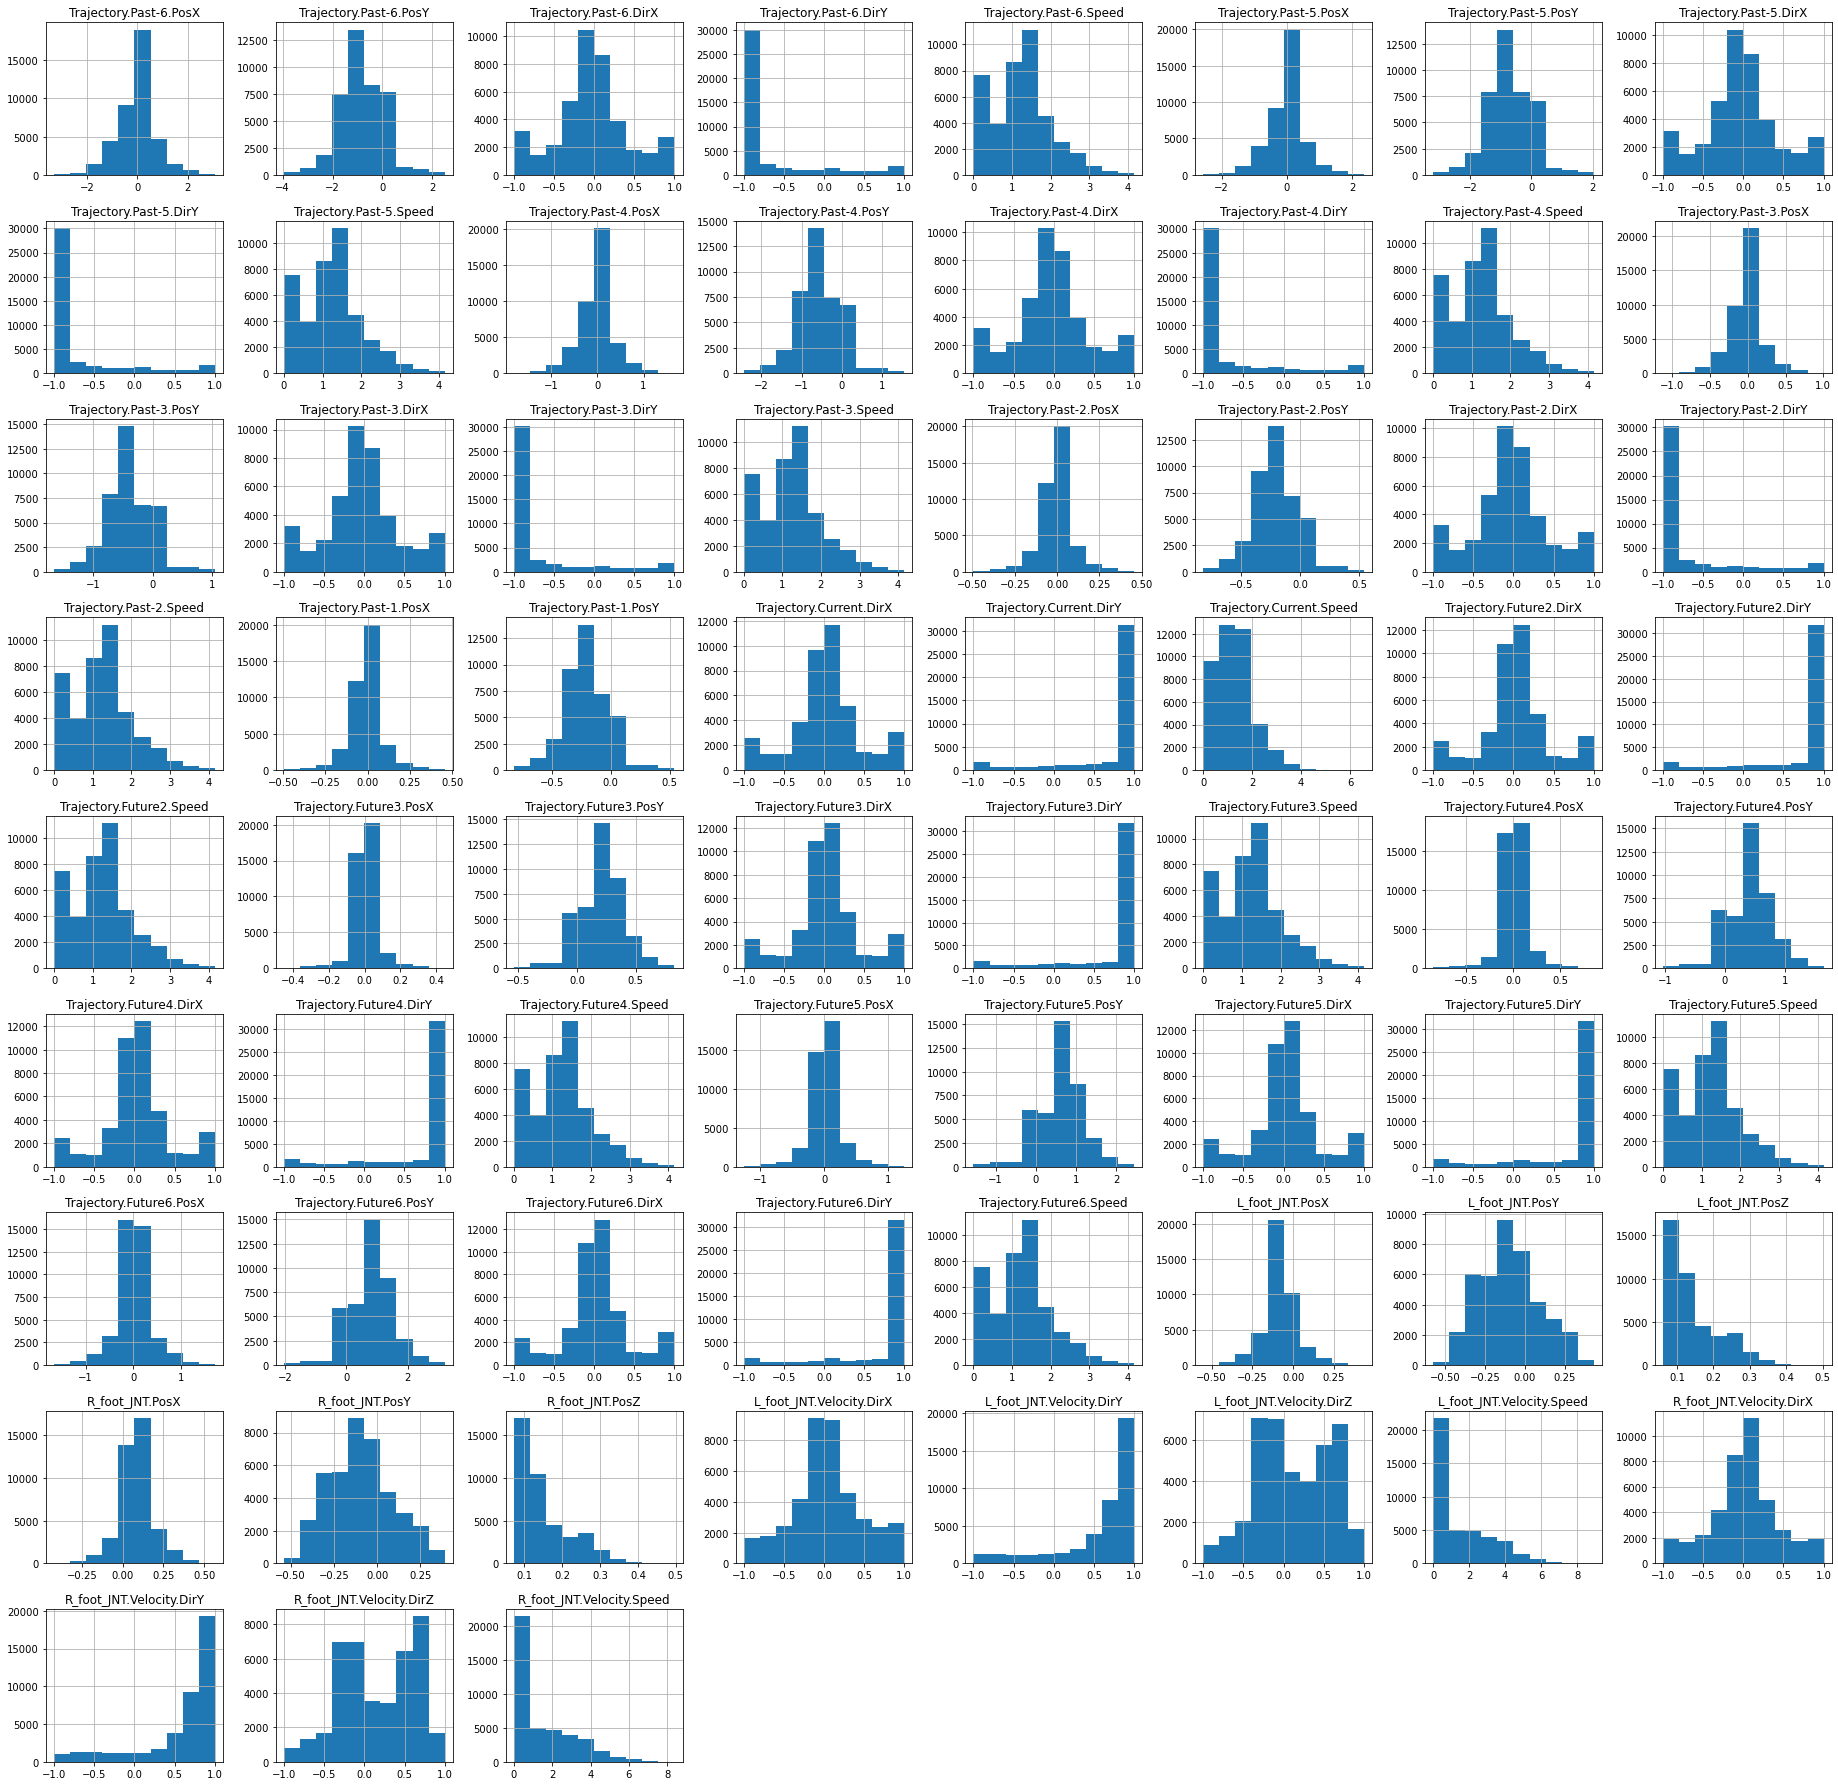

In [7]:
def Histogram(data):
    image = data.hist(figsize = [32, 32])

    
Histogram(cleanedData)

## Boxplot per feature component
Median in orange inside the box<br/>
Box = Interquartile range, which means 50% of the data lies within the box<br/>
Black line range = 99,3% of the values<br/>
Semi-transparent outliers represent the rest 0.7%<br/>

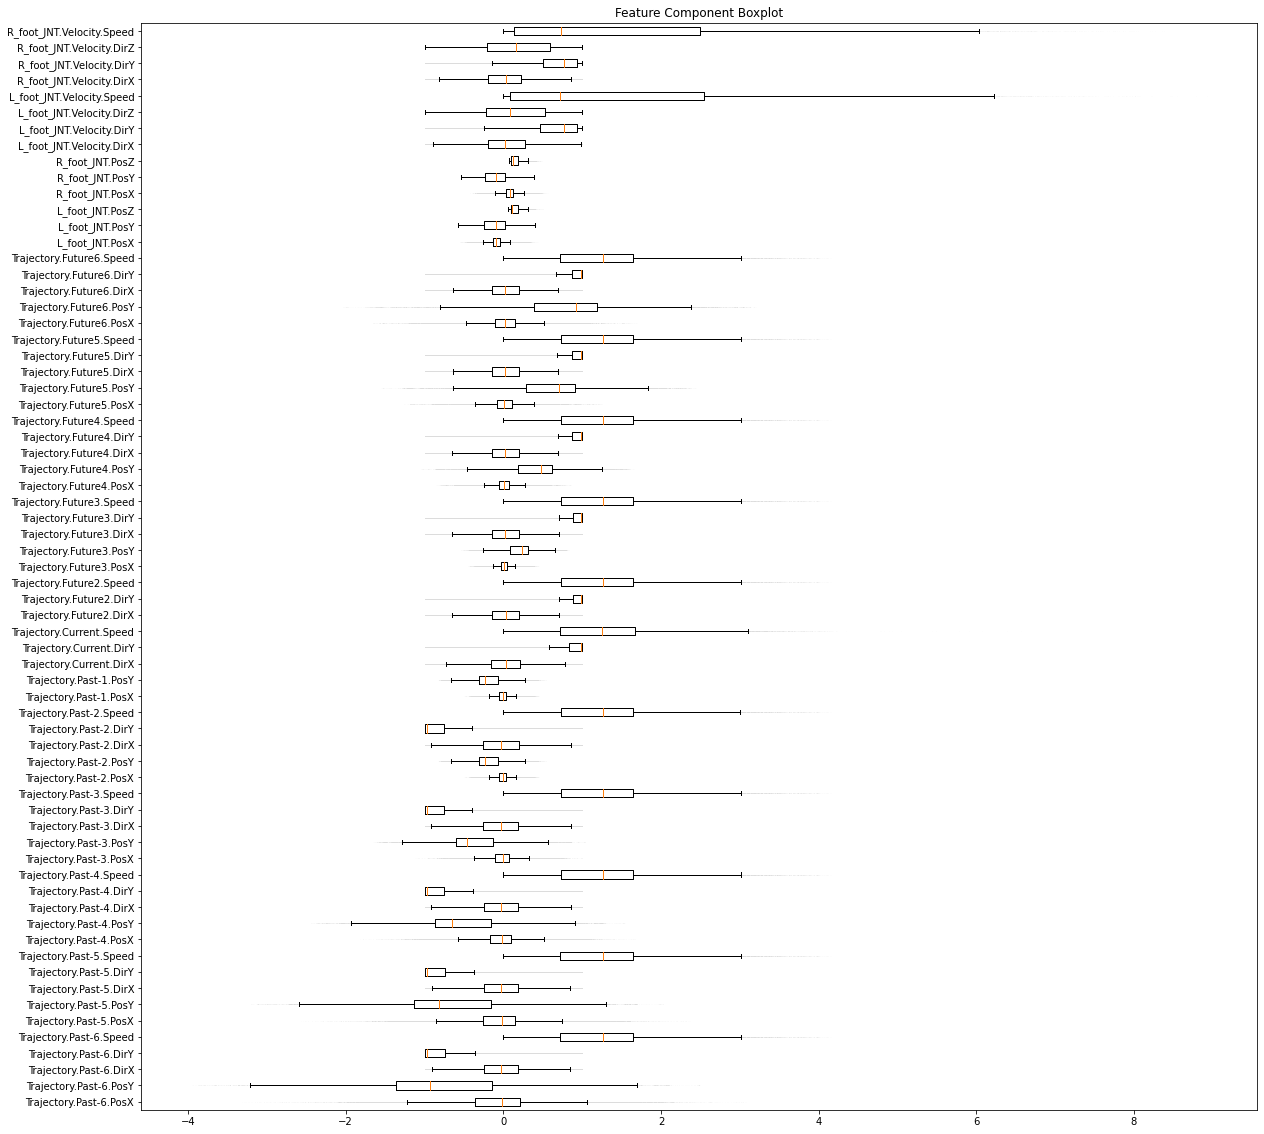

In [8]:
def BoxPlot(data, featureComponentCount):
    minValuePerColumn = data.min(axis=0)
    maxValuePerColumn = data.max(axis=0)

    fig1, ax1 = plt.subplots(figsize=(20,20))
    ax1.set_title('Feature Component Boxplot')

    # Render outliers
    flierprops = dict(marker='o', markerfacecolor='gainsboro', markersize=1, linestyle='none', markeredgecolor='gainsboro', alpha=0.005)
    ax1.boxplot(data, vert=False, flierprops=flierprops)

    # Create an array containing values ranging from 1 to featureComponentCount
    elementNumbers = np.array([i+1 for i in range(featureComponentCount)])

    plt.yticks(elementNumbers, data.columns)
    plt.show()


BoxPlot(cleanedData, cleanedData.shape[1])

## Feature correlation heatmap

<AxesSubplot:>

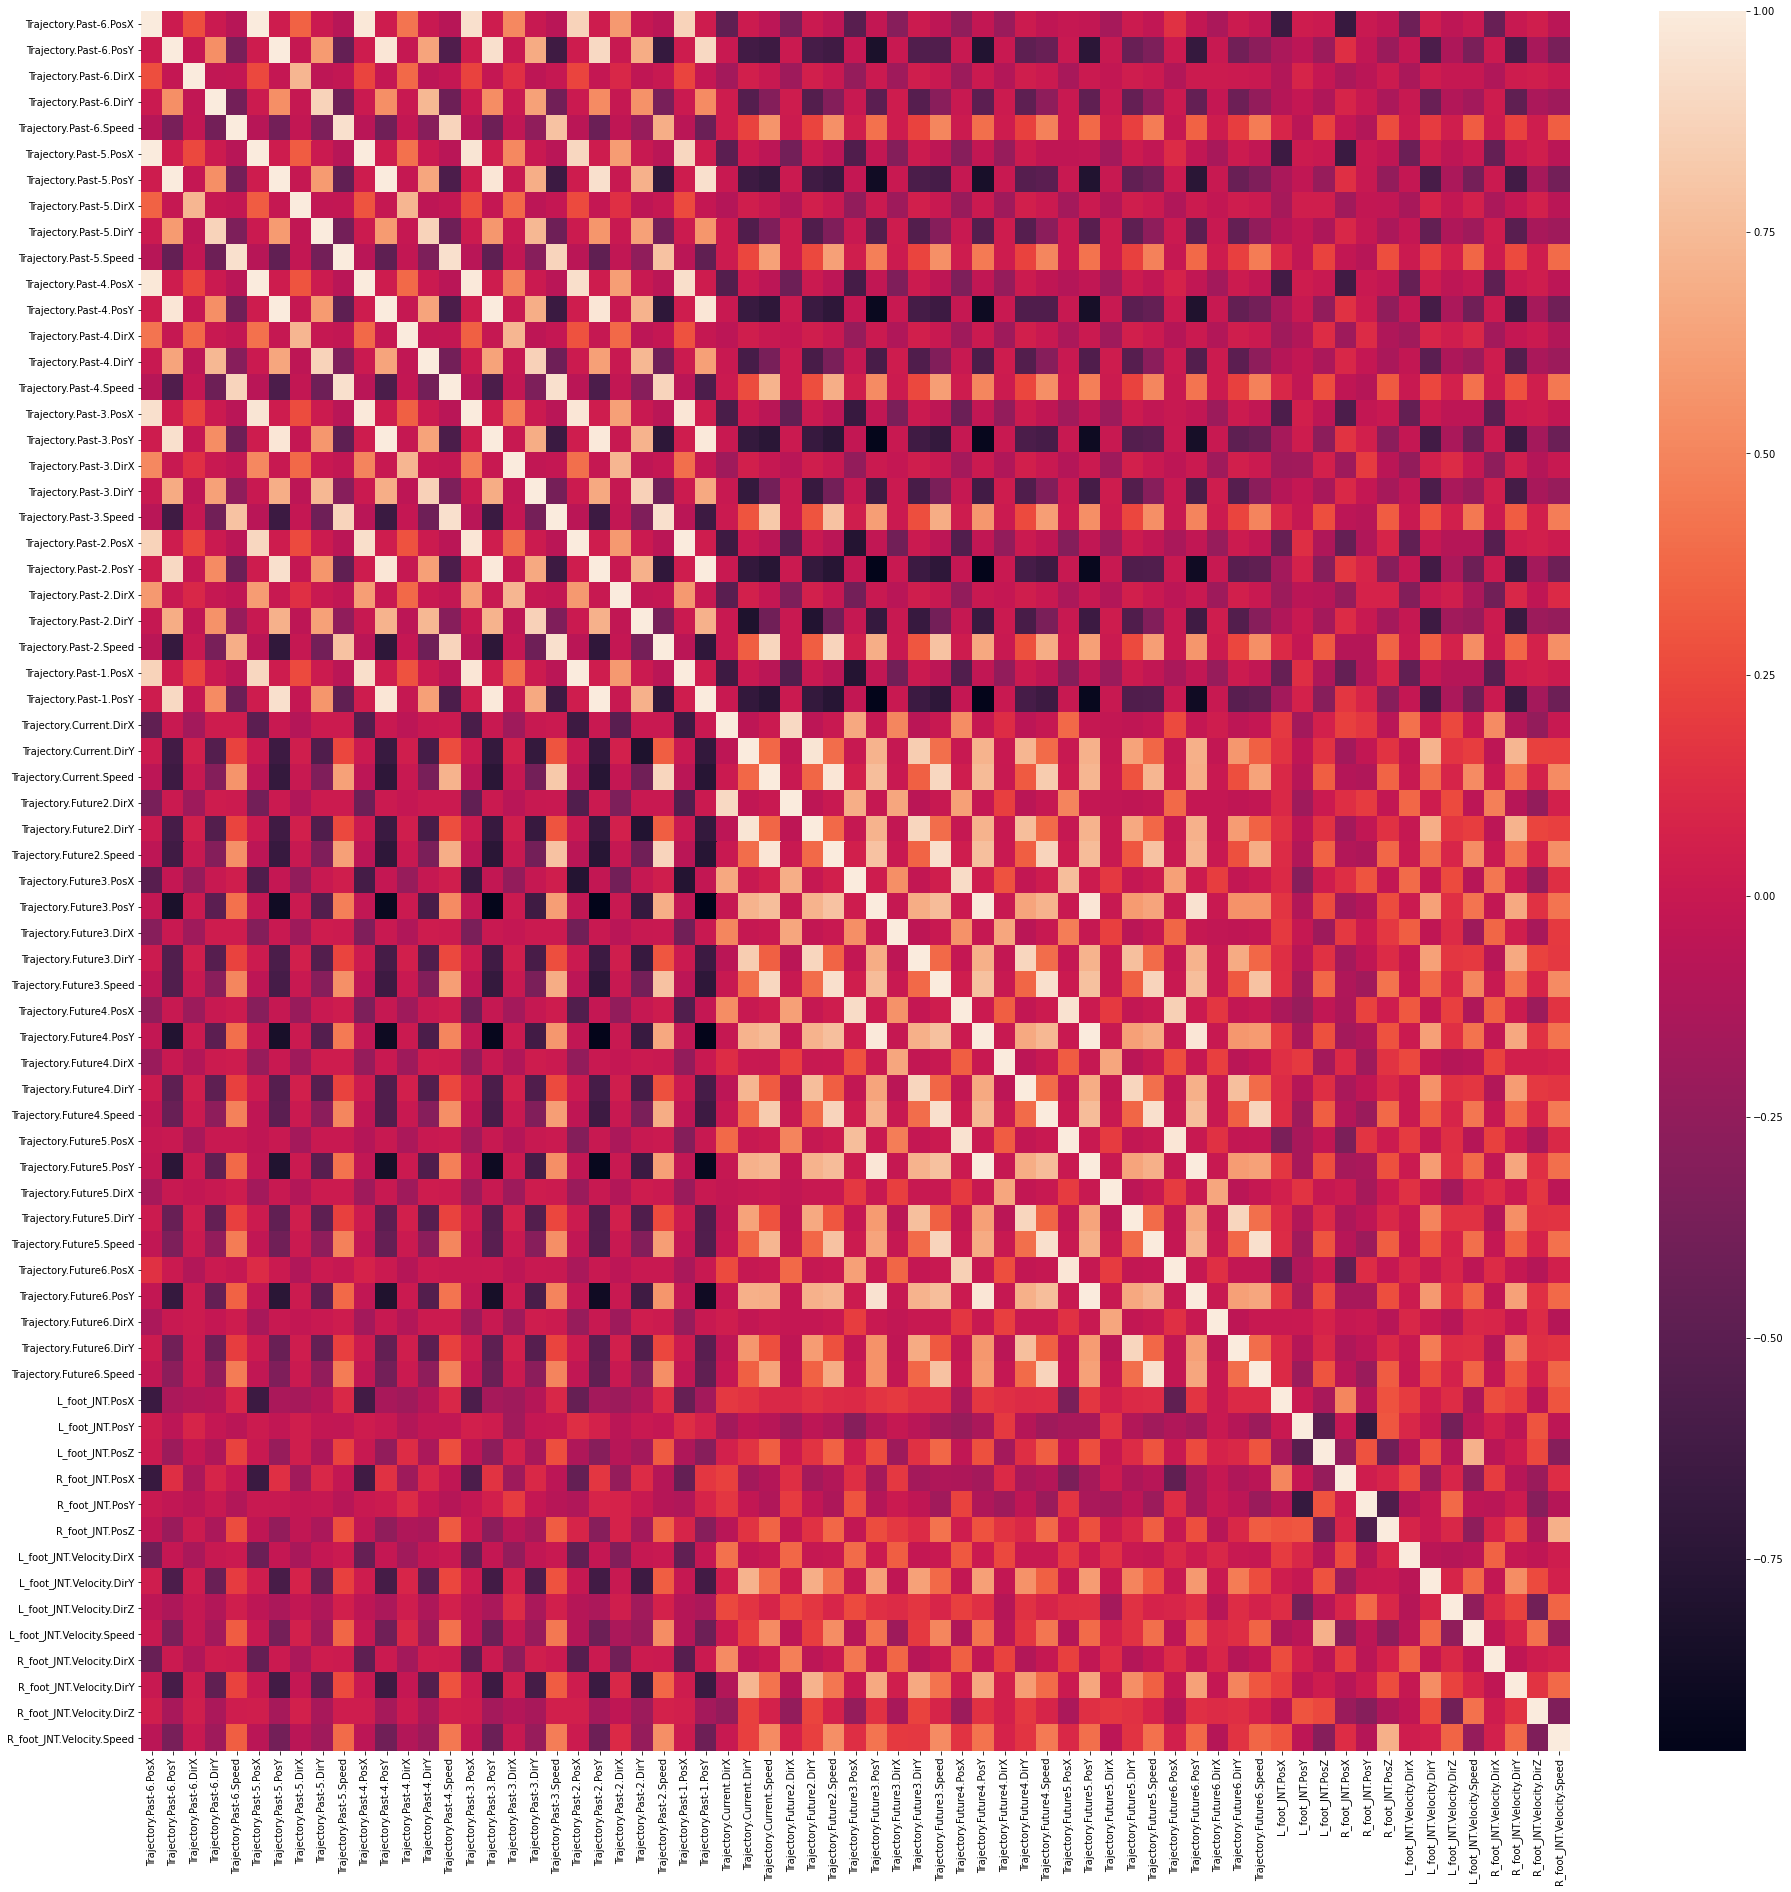

In [9]:
# not used in drawing, this just prints the values
correlationMatrix = cleanedData.corr()

# plot the correlation heatmap
plt.figure(figsize=[32, 32])
sns.heatmap(data=correlationMatrix)

## Scatterplot using PCA
Use principal component analysis to project the multi-dimensional data down to 2D

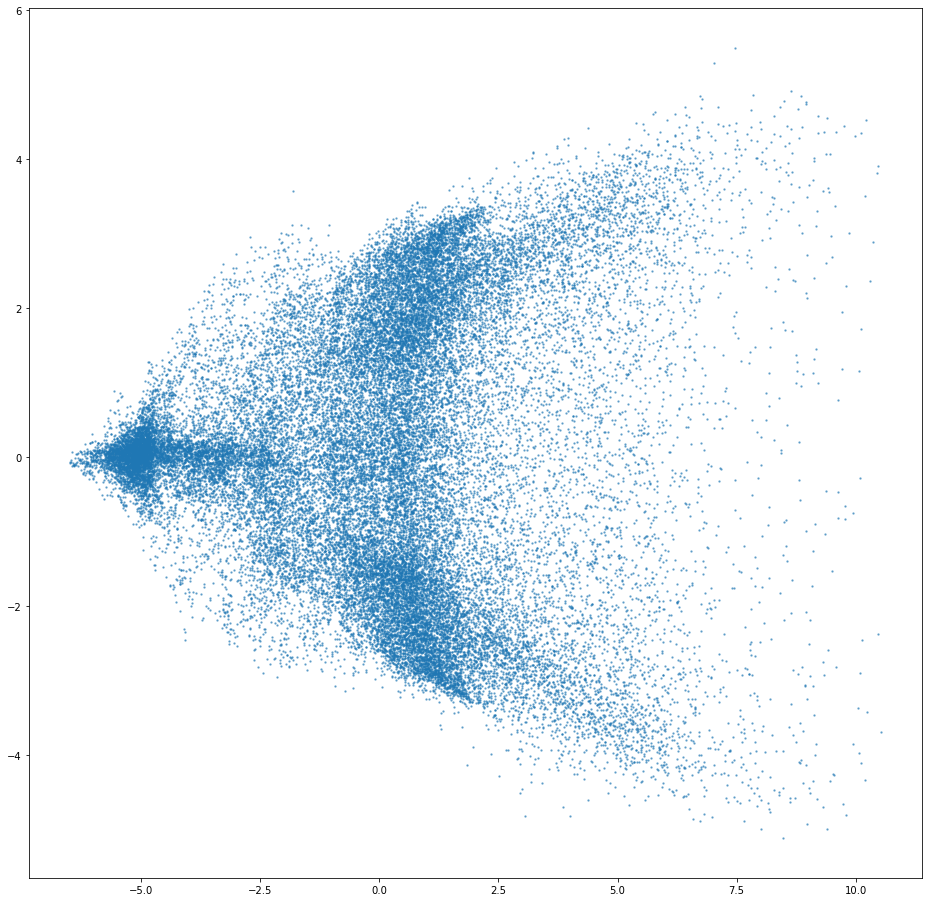

In [10]:
def ScatterPlotPCA(data):
    pca = PCA(n_components=2)
    pca.fit(data)
    pcaData = pca.transform(data)
    
    pca_x = pcaData[:, 0]
    pca_y = pcaData[:, 1]
    plt.figure(figsize=(16, 16))
    plt.scatter(pca_x, pca_y, s=2.0, alpha=0.5)

    
ScatterPlotPCA(cleanedData)

# Data Transformation
# Normalization

In [11]:
# mean normalization
# normalized_df=(df-df.mean())/df.std()

# min-max normalization
# normalized_df=(df-df.min())/(df.max()-df.min())

# Note: Pandas automatically applies colomn-wise function in the code above.

# Using sklearn
x = cleanedData.values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled = min_max_scaler.fit_transform(x)

normalizedData = pd.DataFrame(data=x_scaled, columns=cleanedData.columns) # copy column names from source

# min values per column used to normalize the data
print("Minimum values per feature component / column")
print(min_max_scaler.data_min_)
print("")

# max values per column used to normalize the data
print("Maximum values per feature component / column")
print(min_max_scaler.data_max_)

Minimum values per feature component / column
[-3.3161745  -3.9493446  -0.99999982 -1.0000001   0.         -2.5670261
 -3.2041168  -0.99999982 -1.0000001   0.         -1.8132591  -2.4377098
 -0.99999982 -1.0000001   0.         -1.124691   -1.6524601  -0.99999982
 -1.0000001   0.         -0.49428558 -0.82322693 -0.99999982 -1.0000001
  0.         -0.49428558 -0.82322693 -1.0000001  -1.          0.
 -1.         -1.0000001   0.         -0.45068359 -0.53904915 -0.99999994
 -1.0000001   0.         -0.85384893 -1.0414047  -0.99999994 -1.
  0.         -1.2607121  -1.5479069  -1.         -1.0000001   0.
 -1.6596985  -2.0354176  -1.         -1.0000001   0.         -0.55170059
 -0.57299995  0.06103754 -0.42032814 -0.53796005  0.07168126 -0.99993277
 -0.99952948 -1.          0.         -0.99978769 -0.99999678 -1.
  0.        ]

Maximum values per feature component / column
[3.0757561  2.4914627  1.0000001  1.0000001  4.1579819  2.3653488
 2.032032   0.99999994 1.0000001  4.1579919  1.6707001  1.5

In [12]:
normalizedData.head(15)

,Trajectory.Past-6.PosX,Trajectory.Past-6.PosY,Trajectory.Past-6.DirX,Trajectory.Past-6.DirY,Trajectory.Past-6.Speed,Trajectory.Past-5.PosX,Trajectory.Past-5.PosY,Trajectory.Past-5.DirX,Trajectory.Past-5.DirY,Trajectory.Past-5.Speed,Trajectory.Past-4.PosX,Trajectory.Past-4.PosY,Trajectory.Past-4.DirX,Trajectory.Past-4.DirY,Trajectory.Past-4.Speed,Trajectory.Past-3.PosX,Trajectory.Past-3.PosY,Trajectory.Past-3.DirX,Trajectory.Past-3.DirY,Trajectory.Past-3.Speed,Trajectory.Past-2.PosX,Trajectory.Past-2.PosY,Trajectory.Past-2.DirX,Trajectory.Past-2.DirY,Trajectory.Past-2.Speed,Trajectory.Past-1.PosX,Trajectory.Past-1.PosY,Trajectory.Current.DirX,Trajectory.Current.DirY,Trajectory.Current.Speed,Trajectory.Future2.DirX,Trajectory.Future2.DirY,Trajectory.Future2.Speed,Trajectory.Future3.PosX,Trajectory.Future3.PosY,Trajectory.Future3.DirX,Trajectory.Future3.DirY,Trajectory.Future3.Speed,Trajectory.Future4.PosX,Trajectory.Future4.PosY,Trajectory.Future4.DirX,Trajectory.Future4.DirY,Trajectory.Future4.Speed,Trajectory.Future5.PosX,Trajectory.Future5.PosY,Trajectory.Future5.DirX,Trajectory.Future5.DirY,Trajectory.Future5.Speed,Trajectory.Future6.PosX,Trajectory.Future6.PosY,Trajectory.Future6.DirX,Trajectory.Future6.DirY,Trajectory.Future6.Speed,L_foot_JNT.PosX,L_foot_JNT.PosY,L_foot_JNT.PosZ,R_foot_JNT.PosX,R_foot_JNT.PosY,R_foot_JNT.PosZ,L_foot_JNT.Velocity.DirX,L_foot_JNT.Velocity.DirY,L_foot_JNT.Velocity.DirZ,L_foot_JNT.Velocity.Speed,R_foot_JNT.Velocity.DirX,R_foot_JNT.Velocity.DirY,R_foot_JNT.Velocity.DirZ,R_foot_JNT.Velocity.Speed
0,0.518806,0.613175,0.5,0.5,0.0,0.520444,0.611922,0.5,0.5,0.0,0.520459,0.611840,0.5,0.5,0.0,0.528462,0.613380,0.500000,0.500000,0.000000,0.520769,0.603717,0.500000,0.500000,0.000000,0.520769,0.603717,0.089118,0.784915,1.000000,0.093387,0.790974,0.263183,0.303696,0.486382,0.446728,0.997154,0.010366,0.399017,0.435441,0.524862,0.999381,0.042348,0.445914,0.425047,0.590033,0.991827,0.110990,0.478753,0.421644,0.594908,0.990910,0.199460,0.467884,0.571409,0.035219,0.517916,0.580203,0.011574,0.005130,0.437658,0.535584,0.390433,0.048691,0.287819,0.537457,0.378915
1,0.549441,0.628356,0.5,0.5,0.0,0.560144,0.630595,0.5,0.5,0.0,0.576664,0.636380,0.5,0.5,0.0,0.620470,0.649672,0.500000,0.500000,0.000000,0.727074,0.675419,0.500000,0.500000,0.000000,0.727074,0.675419,0.236568,0.924975,0.002780,0.293213,0.955235,0.004923,0.500025,0.396145,0.472372,0.999236,0.013293,0.497533,0.391844,0.535301,0.998752,0.051426,0.501564,0.402440,0.589240,0.991972,0.124175,0.500536,0.418512,0.600421,0.989812,0.225409,0.507724,0.436447,0.080344,0.533629,0.571771,0.063591,0.019482,0.467322,0.634438,0.471490,0.092171,0.326805,0.732093,0.444623
2,0.549475,0.628308,0.5,0.5,0.0,0.560188,0.630536,0.5,0.5,0.0,0.576726,0.636303,0.5,0.5,0.0,0.620571,0.649558,0.500000,0.500000,0.000000,0.727302,0.675192,0.500000,0.500000,0.000000,0.727302,0.675192,0.244051,0.929523,0.002641,0.317371,0.965453,0.005405,0.500082,0.396479,0.499118,0.999999,0.017531,0.497900,0.393327,0.548678,0.997625,0.061396,0.502575,0.405487,0.585415,0.992650,0.137236,0.501936,0.422861,0.607399,0.988329,0.259898,0.508274,0.436038,0.080425,0.533962,0.571566,0.063939,0.624352,0.974965,0.594566,0.000502,0.475401,0.902824,0.795439,0.001030
3,0.549510,0.628252,0.5,0.5,0.0,0.560234,0.630468,0.5,0.5,0.0,0.576791,0.636213,0.5,0.5,0.0,0.620678,0.649425,0.500000,0.500000,0.000000,0.727541,0.674929,0.500000,0.500000,0.000000,0.727541,0.674929,0.260643,0.938985,0.002866,0.345631,0.975573,0.006264,0.500120,0.397040,0.523777,0.999434,0.022807,0.498460,0.395232,0.560891,0.996278,0.072068,0.503895,0.408947,0.581192,0.993364,0.149730,0.503458,0.427447,0.617170,0.986077,0.300566,0.508676,0.435624,0.080469,0.534239,0.571381,0.064392,0.641681,0.974582,0.568537,0.000508,0.480323,0.875427,0.829922,0.001184
4,0.549550,0.628181,0.5,0.5,0.0,0.560285,0.630381,0.5,0.5,0.0,0.576864,0.636099,0.5,0.5,0.0,0.620797,0.649256,0.500000,0.500000,0.000000,0.727807,0.674596,0.500000,0.500000,0.000000,0.727807,0.674596,0.299

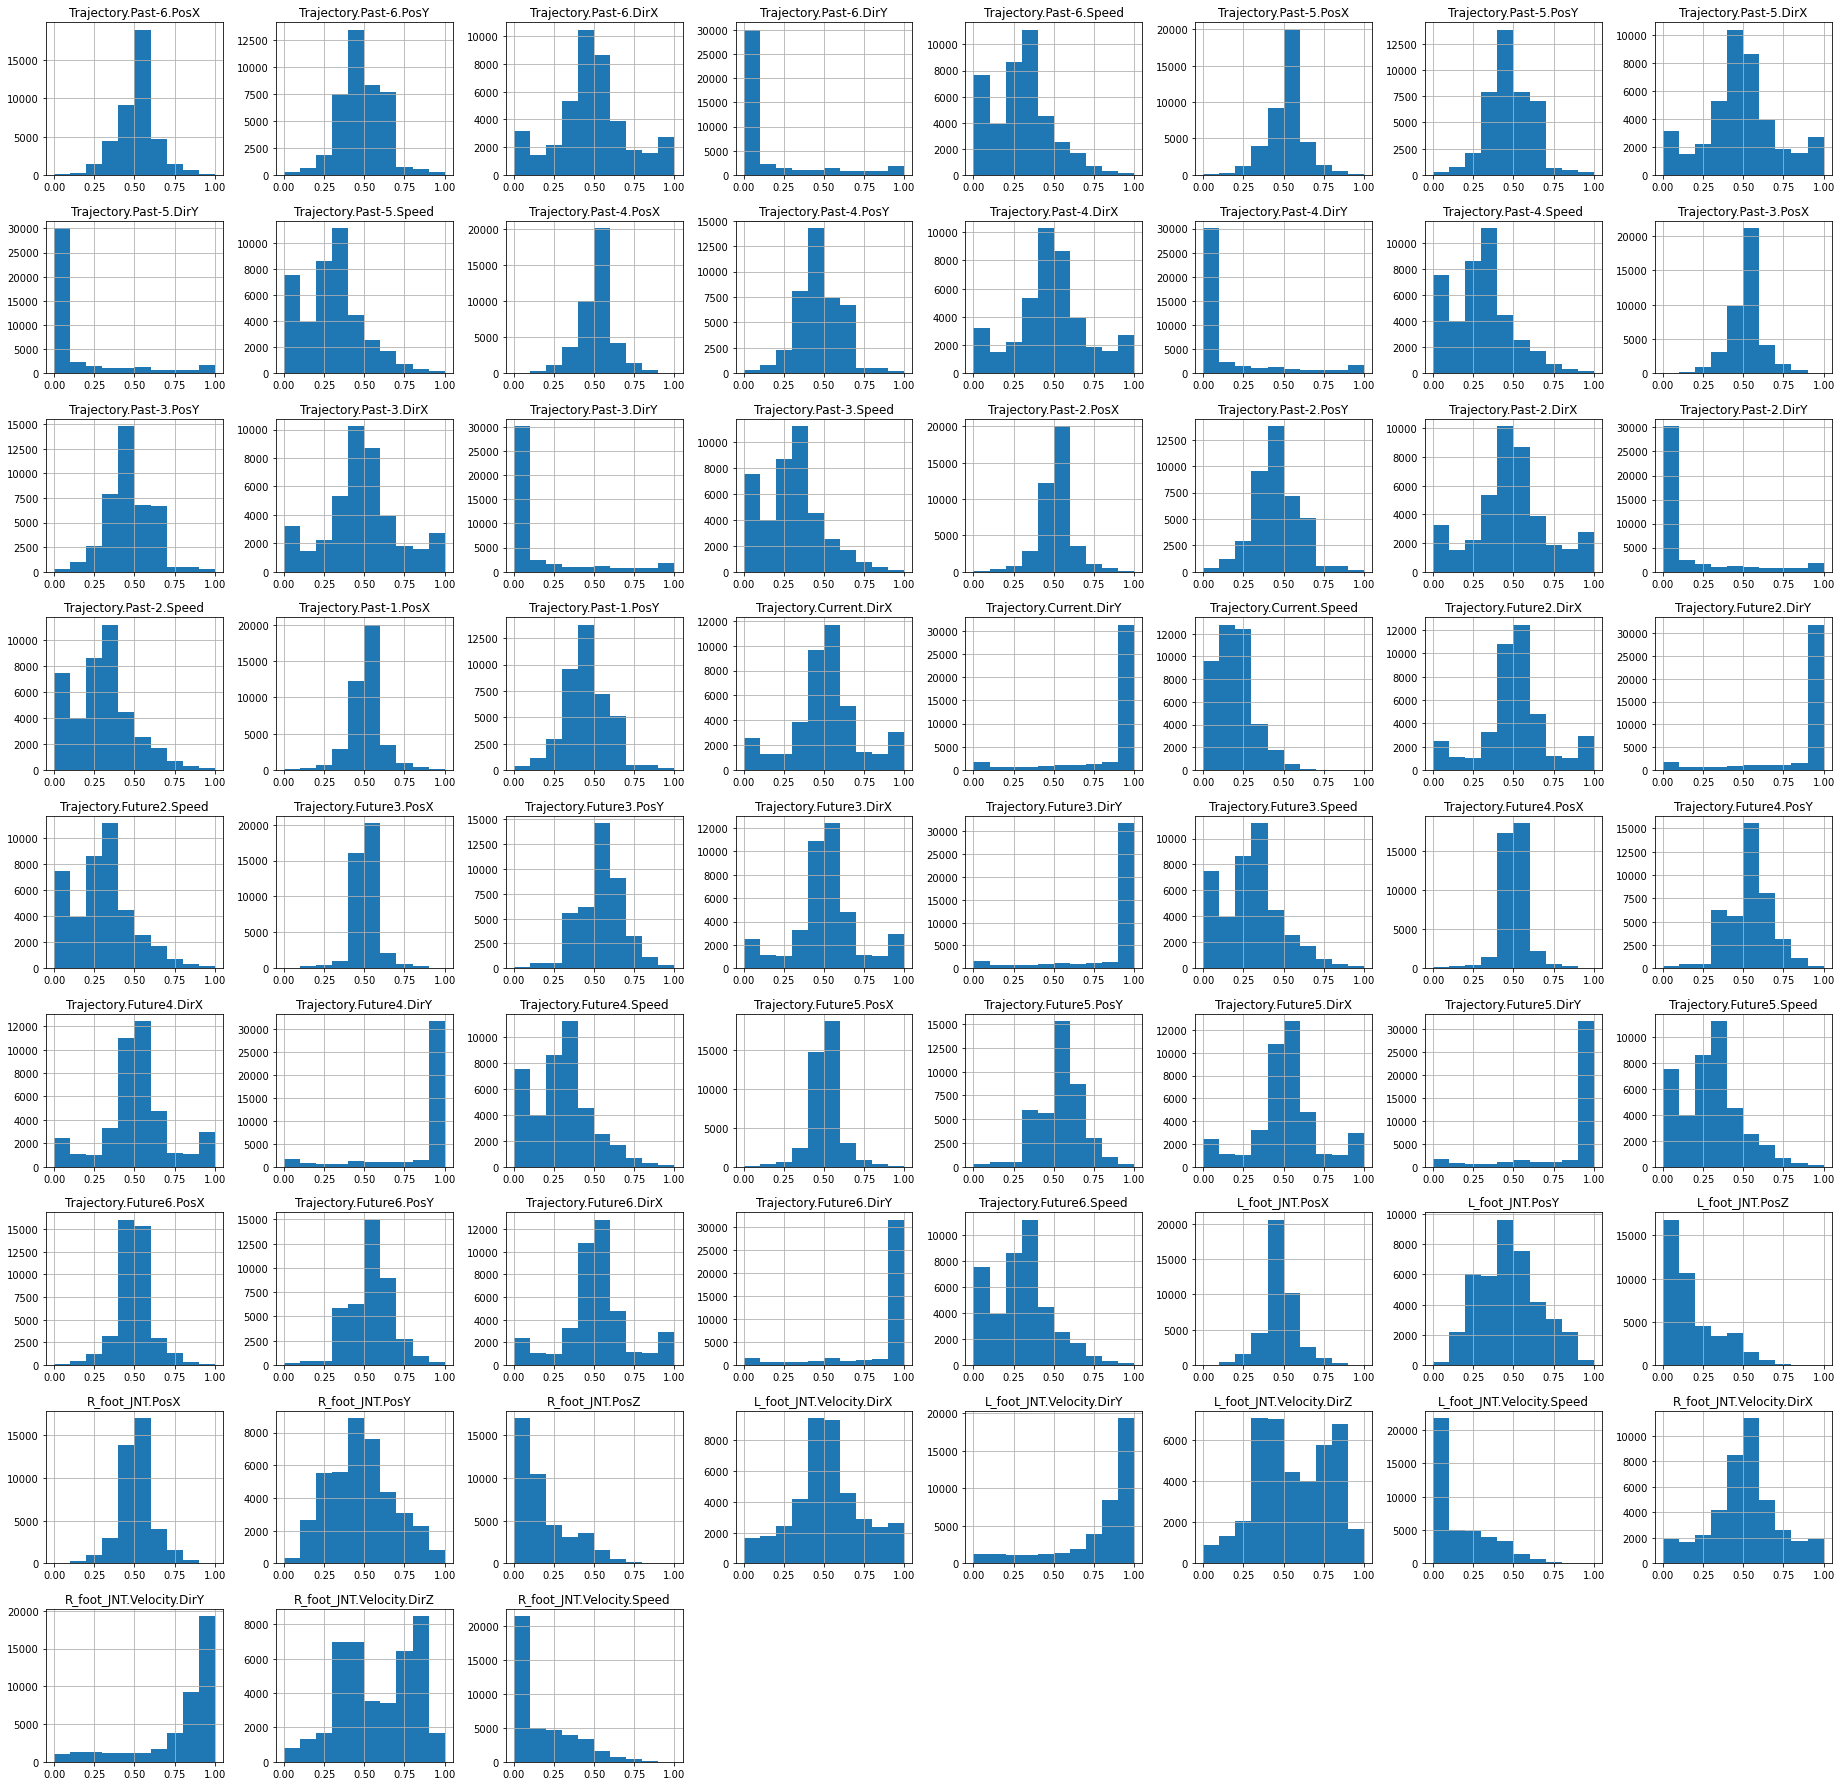

In [13]:
Histogram(normalizedData)

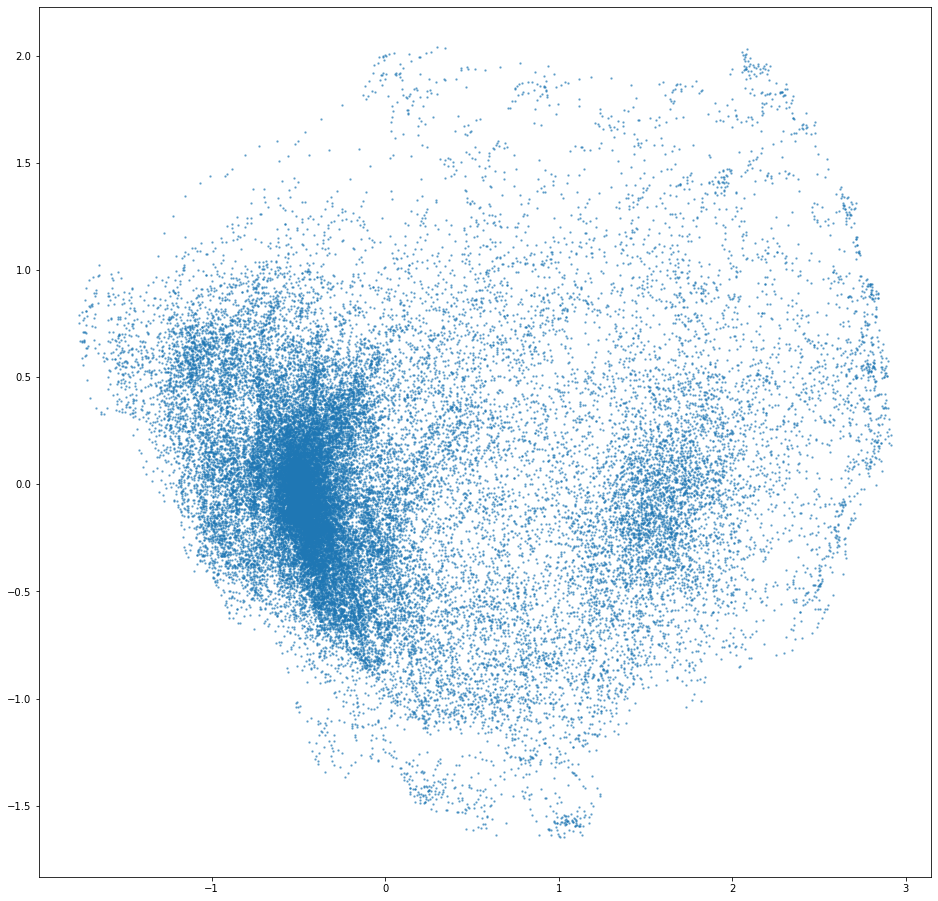

In [14]:
ScatterPlotPCA(normalizedData)